# Práctica 8: Aprendizaje supervisado II

Esta práctica tiene como objetivos:
- Evaluar algoritmos de clasificación.
- Ajustar hiperparámetros.

Además de este notebook tienes dos notebooks con ejercicios adicionales.  

## Evaluando la clasificación binaria

### 0. Carga de datos

##### Ejercicio
Carga los datos del fichero pima-indians-diabetes.csv utilizando la librería pandas como hicimos en prácticas anteriores. Almacena los vectores de descriptores en una variable X y las etiquetas en una variable Y

In [0]:
import pandas as pd
dataset = pd.read_csv('pima-indians-diabetes.csv')
datasetSinClase = dataset.iloc[:,:-1]
X = datasetSinClase.values
datasetSoloLabels = dataset.iloc[:,-1]
Y = datasetSoloLabels.values

En esta práctica no hay tests, pero al ejecutar la siguiente celda deberías obtener los siguientes valores para las distintas variables.

|expresión|resultado|
|---|---|
|Longitud X|767|
|X[4]|[   5.   ,  116.   ,   74.   ,    0.   ,    0.   ,   25.6  ,  0.201,   30.   ]|
|Y[10]|1|
|Y[50]|0|

In [0]:
print("Longitud X:")
print(len(X))
print("X[4]:")
print(X[4])
print("Y[10]:")
print(Y[10])
print("Y[50]:")
print(Y[50])

Longitud X:
767
X[4]:
[   5.     116.      74.       0.       0.      25.6      0.201   30.   ]
Y[10]:
1
Y[50]:
0


### 1. Partición de conjunto de entrenamiento y test

Como vimos en clase es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función train_test_split de la librería sklearn.

In [0]:
from sklearn.model_selection import train_test_split

A la función train_test_split le vamos a pasar 4 parámetros:
  - las instancias de nuestro dataset (sin etiqueta), es decir X,
  - las etiquetas (es decir Y),
  - el porcentage del dataset que se utilizará para el conjunto de test
    (en este caso 0.25).
  - el estado aleatorio: un número para poder reproducir los resultados.
  
El resultado devuelto por la función es una tupla de 4 elementos que contiene el conjunto de entrenamiento, el conjunto de test, las etiquetas  del conjunto de entrenamiento y las etiquetas del conjunto de test.

In [0]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

##### Ejercicio
Carga las distintas librerías que son necesarias para los clasificadores definidos en la práctica 7. En concreto vas a construir clasificadores utilizando los algoritmos:
 - KNN
 - Árboles de decisión
 - Regresión logística
 - SVM
 - Redes neuronales

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

#### 2.1.  Validación manual (holdout)

La primera alternativa para seleccionar los hiperparámetros consiste en reservar una parte de las instancias del training set para validación, y probar distintos hiperparámetros de manera manual para ver cuál es la mejor solución con cada uno de ellos. Para ello utilizamos de nuevo la función `train_test_split`.

In [0]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
                                                                test_size=0.1, random_state=84)

**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1  y 25.

In [0]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=58.62%
k=3, precisión=63.79%
k=5, precisión=58.62%
k=7, precisión=65.52%
k=9, precisión=63.79%
k=11, precisión=68.97%
k=13, precisión=67.24%
k=15, precisión=67.24%
k=17, precisión=62.07%
k=19, precisión=62.07%
k=21, precisión=63.79%
k=23, precisión=63.79%
k=25, precisión=68.97%


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

In [0]:
con K = 11 o con K = 25

**Árboles de decisión**

Repite lo mismo visto para KNN para los árboles de decisión con el hiperparámetro min_samples_split con valores entre 2 y 10 avanzando de 1 en 1. Puedes ver lo que hace este hiperparámetro en la [documentación de sklearn](http://scikit-learn.org/stable/modules/tree.html).


In [0]:
for k in range(2,11):
    modelDecisionTree = DecisionTreeClassifier(min_samples_split=k)
    modelDecisionTree.fit(trainData, trainLabels)
    score = modelDecisionTree.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))


k=2, precisión=62.07%
k=3, precisión=63.79%
k=4, precisión=62.07%
k=5, precisión=63.79%
k=6, precisión=67.24%
k=7, precisión=65.52%
k=8, precisión=67.24%
k=9, precisión=63.79%
k=10, precisión=63.79%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de min_samples_split obtenemos mejor precisión?


In [0]:
con k = 5 obtenemos la mejor precicision de un 68.97%

**Regresión logística**

Repite lo mismo visto para KNN para la regresión logística con C tomando los valores 0.1,1,10,100, y 1000.

In [0]:
for k in [0.1, 1, 10, 1000]:
    modelLogisticRegression = LogisticRegression(C=k)
    modelLogisticRegression.fit(trainData, trainLabels)
    score = modelLogisticRegression.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))


k=0, precisión=67.24%
k=1, precisión=65.52%
k=10, precisión=60.34%
k=1000, precisión=62.07%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de C obtenemos mejor precisión?


In [0]:
con k = 0 obtenemos la mejor precision con un valor de 67.24%

#### 2.2. 10-fold cross validation 

Una alternativa al método anterior donde hacemos la separación del training set en training y validation de manera manual, consiste en utilizar el k-fold cross validation. Existen distintas alternativas para el k-fold cross validation en sklearn.

Recuperamos lo primero todo nuestro conjunto de entrenamiento uniendo el conjunto de entrenamiento y el de validación.

In [0]:
import numpy as np
trainData=np.concatenate((trainData,valData),axis=0)
trainLabels=np.concatenate((trainLabels,valLabels),axis=0)

**KNN**

La manera más sencilla de utilizar el k-fold validation consiste en utilizar la función `cross_val_score`.

In [0]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.68 (+/- 0.11)
k=3, Precisión: 0.68 (+/- 0.10)
k=5, Precisión: 0.71 (+/- 0.12)
k=7, Precisión: 0.72 (+/- 0.12)
k=9, Precisión: 0.71 (+/- 0.14)
k=11, Precisión: 0.74 (+/- 0.11)
k=13, Precisión: 0.73 (+/- 0.11)
k=15, Precisión: 0.73 (+/- 0.12)
k=17, Precisión: 0.73 (+/- 0.14)
k=19, Precisión: 0.73 (+/- 0.11)
k=21, Precisión: 0.73 (+/- 0.12)
k=23, Precisión: 0.72 (+/- 0.12)
k=25, Precisión: 0.73 (+/- 0.14)


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

In [0]:
con k = 11 obtenemos la mejor precision con un valor de 0.74

#### 2.3. K-fold combinado con GridSearch method

La mejor manera de seleccionar hiperparámetros consiste en combinar el k-fold cross validation con técnicas de búsqueda como el GridSearch o RandomSearch.

**SVM**

Veámos primero cómo seleccionar los mejores hiperparámetros para el SVM usando GridSearch (que ya por debajo utiliza cross-validation).

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Para utilizar este método debemos fijar: 

(1) el clasificador que vamos a utilizar

In [0]:
modelSVM = SVC()

(2) el espacio de parámetros a buscar

In [0]:
tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [2, 3],
                     'C': [0.1,1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

(3) La función (o funciones) de evaluación.

In [0]:
scores = ['precision', 'recall']

A continuación definimos una función que tomando estos parámetros, y el número de folds, busca el mejor conjunto de hiperparámetros a utilizar para el modelo dado. 

In [0]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

Por ejemplo, para buscar los mejores hiperparámetros para el modelo SVM utilizamos la siguiente instrucción. La ejecución de la siguiente celda puede llevar bastante tiempo.

In [0]:
import time
%time
gridsearch(modelSVM,tuned_parameters,scores,10)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
# Tuning hyper-parameters for precision



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classificatio

KeyboardInterrupt: 

##### Pregunta

¿Con qué valores se obtienen mejores resultados?


In [0]:
Le cuesta entre 20 minutos y media hora, asi que no sabemos el resultado.

#### 2.4. K-fold combinado con RandomSearch method

Como podemos ver el proceso anterior es bastante costoso ya que es necesario probar todas las posibles combinaciones y además utilizando k-fold cross validation. Una alternativa a esta aproximación consiste en utilizar Random Search que no hace una búsqueda exhaustiva con todos los hiperparámetros sino que hace una búsqueda aleatorea. 

In [0]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model,parameters):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(model, parameters,cv=5)
    clf.fit(trainData, trainLabels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Podemos ejecutar la función anterior con la siguiente celda. 

In [0]:
%time
randomsearch(modelSVM, {'kernel': ['sigmoid','linear'], 
                        'gamma': sp_randint(2, 20), 'C': sp_randint(0.1, 100)})

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
# Tuning hyper-parameters for 0.6206896551724138



KeyboardInterrupt: 

##### Pregunta

¿Con qué valores se obtienen mejores resultados?

In [0]:
kernel = 'linear', 'C' = 32, 'gamma' = 4

##### Ejercicio

Utilizando RandomSearch busca los mejores hiperparámetros para una red neuronal multicapa con las siguientes configuraciones de capas (5,2), (3,3,3), (5,3,2), (5,4,3,2); con funciones de activación: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’; con momentum: 0.9,0.95,0.99; y learning_rate_init: 0.001,0.01,0.1.

In [0]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron1 = MLPClassifier()
randomsearch(modelMultiLayerPerceptron1, {'hidden_layer_sizes': [[5,2],[3,3,3],[5,3,2],[5,4,3,2]], 
                        'activation': ['identity','logistic','tanh', 'relu'], 'momentum': [0.9, 0.95, 0.99],
                         'learning_rate_init': [0.001,0.01,0.1]})

# Tuning hyper-parameters for 0.620689655172
()


/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Best parameters set found on development set:
()
{'activation': 'tanh', 'learning_rate_init': 0.01, 'momentum': 0.9, 'hidden_layer_sizes': [5, 2]}
()


##### Pregunta
¿Con qué valores se obtienen mejores resultados?

In [0]:
activation = identity , momentum = 0.99 , hidden_layers_sizes = [5, 3, 2] , learning_rate_init = 0.01

##### Ejercicio
Utilizando los hiperparámetros que mejores resultados han dado hasta ahora para cada modelo, define y entrena un clasificador para cada uno de ellos.

**KNN**

In [0]:
modelKNN = KNeighborsClassifier(n_neighbors=11)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

**Árboles de decisión**

In [0]:
modelDecisionTree = DecisionTreeClassifier(min_samples_split=5)
modelDecisionTree.fit(trainData, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**Regresión Logística**

In [0]:
modelLogisticRegression = LogisticRegression(C=0.1)
modelLogisticRegression.fit(trainData, trainLabels)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**SVM**

In [0]:
modelSVM = SVC(kernel='linear',C=32,gamma=4)
modelSVM.fit(trainData, trainLabels)

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=4, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Redes neuronales**

In [0]:
modelMultiLayerPerceptron1 = MLPClassifier(activation='identity',hidden_layer_sizes=(5, 3, 2),learning_rate_init=0.01,momentum=0.99)
modelMultiLayerPerceptron1.fit(trainData, trainLabels)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.99,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### 3. Evaluando los algoritmos en el conjunto de test

Para evaluar los distintos algoritmos vamos a utilizar la función classification_report de la librería sklearn. Para ello hacemos la predicción con respecto al conjunto de test y mostramos los resultados.

In [0]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
             precision    recall  f1-score   support

          0       0.77      0.81      0.79       124
          1       0.61      0.56      0.58        68

avg / total       0.71      0.72      0.72       192



##### Ejercicio
Repite lo mismo para árboles de decisión, regresión logística, SVMs, y redes neuronales multicapa.

**Árboles de decisión**

In [0]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO DecissionTree")
predictionsDecissionTree = modelDecisionTree.predict(testData)
print(classification_report(testLabels, predictionsDecissionTree))

EVALUACIÓN EN CONJUNTO DE TEST USANDO DecissionTree
             precision    recall  f1-score   support

          0       0.81      0.79      0.80       124
          1       0.63      0.66      0.65        68

avg / total       0.75      0.74      0.75       192



**Regresión Logística**

In [0]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO LogisticRegression")
predictionsLogisticRegression = modelLogisticRegression.predict(testData)
print(classification_report(testLabels, predictionsLogisticRegression))

EVALUACIÓN EN CONJUNTO DE TEST USANDO LogisticRegression
             precision    recall  f1-score   support

          0       0.80      0.90      0.85       124
          1       0.76      0.60      0.67        68

avg / total       0.79      0.79      0.79       192



**SVM**

In [0]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO SVM")
predictionsSVM = modelSVM.predict(testData)
print(classification_report(testLabels, predictionsSVM))

EVALUACIÓN EN CONJUNTO DE TEST USANDO SVM
             precision    recall  f1-score   support

          0       0.82      0.90      0.85       124
          1       0.77      0.63      0.69        68

avg / total       0.80      0.80      0.80       192



**Redes neuronales**

In [0]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO MultilayerPerceptron")
predictionsMultilayerPerceptron = modelMultiLayerPerceptron1.predict(testData)
print(classification_report(testLabels, predictionsMultilayerPerceptron))

EVALUACIÓN EN CONJUNTO DE TEST USANDO MultilayerPerceptron
             precision    recall  f1-score   support

          0       0.82      0.70      0.76       124
          1       0.57      0.72      0.64        68

avg / total       0.73      0.71      0.71       192



##### Pregunta
¿Cuál de los clasificadores obtiene mejor precisión? ¿y recall? ¿y f-score?

In [0]:
El mejor es el SVM con una precision de 0.80
El recall nuevamente SVM, con 0.80
Para el f1-score lo mismo, SVM con 0.80

SyntaxError: invalid syntax (<ipython-input-48-abb957f18d4b>, line 1)

### 4. Comparando los algoritmos

Hemos visto cómo obtener informes de las clasificaciones, pero para comparar los algoritmos puede resultar útil utilizar las curvas ROC de cada uno de ellos.

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

##### Ejercicio

Estudia lo que hace la siguiente función.

In [0]:
def drawROCCurves(classifiers,predictions,actualLabels):
    plt.close()
    plt.figure()
    lw = 2
    fpr = dict()
    tpr=dict()
    roc_auc =dict()
    for i,_ in enumerate(classifiers):
        fpr[i],tpr[i],_=roc_curve(actualLabels,predictions[i])
        roc_auc[i]=auc(fpr[i],tpr[i])

    colours = ['darkorange','aqua','red','green','cornflowerblue','yellow']
    for i,_ in enumerate(classifiers):
        plt.plot(fpr[i], tpr[i], color=colours[i], lw=lw, label='ROC curve %s (area = %0.2f)' % (classifiers[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

##### Ejercicio

Utilizando la función anterior genera la curva ROC de todos los clasificadores que has definido anteriormente.

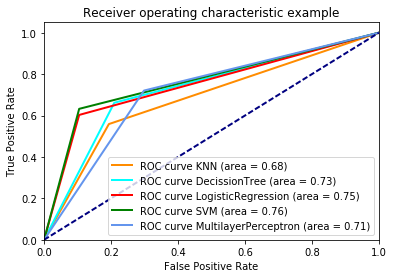

In [0]:
drawROCCurves(['KNN', 'DecissionTree', 'LogisticRegression', 'SVM', 'MultilayerPerceptron'],
              [predictionsKNN, predictionsDecissionTree, predictionsLogisticRegression, predictionsSVM,
              predictionsMultilayerPerceptron],testLabels)

### 5. Estudio estadístico

Lo último que vamos a ver en esta parte es cómo realizar un estudio estadístico basado en lo que vimos en clase, para ello utilizaremos la función `compare_methods` disponible en el módulo StatisticalAnalysis. Puede que para cargar este módulo necesites instalar algún paquete usando `pip`.

In [1]:
import pandas as pd
from StatisticalAnalysis import *

ImportError: ignored

Para utilizar este método debemos comenzar indicando los algoritmos a utilizar y las distribuciones de los hiperparámetros a optimizar. Vamos a utilizar los 5 modelos vistos hasta ahora: árboles de decisión, SVMs, KNN, Regresión logística y red neuronal, así que definimos estos modelos y los parámetros a optimizar.

In [0]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

Creamos tres listas que contendrán respectivamente:

(1) Los algoritmos:

In [0]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

(2) Los parámetros a optimizar:

In [0]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]

(3) Los nombres de los algoritmos:

In [0]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

Invocamos a la función `compare_methods` pasándole el dataset completo, el conjunto de etiquetas completo, las tres listas definidas anteriormente, y la métrica. Los valores válidos
para la métrica son accuracy, precision, recall, f1 o auroc. Al invocar a la función anterior se producirá un informe de resultados. 

temp.csv
['KNN' 'MLP' 'SVM' 'LR' 'Arbol']
Report
**********************************************************
Mean and std
**********************************************************
KNN: 0.666984 (0.073670)
MLP: 0.694743 (0.076654)
SVM: 0.685920 (0.074171)
LR: 0.728990 (0.066970)
Arbol: 0.678560 (0.068006)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.981434, p:0.613816
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.037336, p:0.997241
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
----------------------------------------------------------


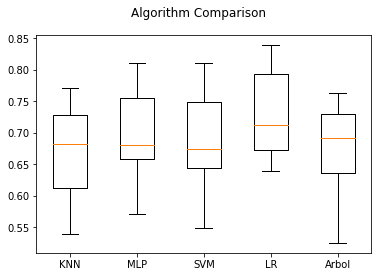

Process PoolWorker-5:
Process PoolWorker-1:
Process PoolWorker-3:
Process PoolWorker-2:
Process PoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/pyth

In [0]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

##### Preguntas

¿Qué tipo de tests se han aplicado? ¿Paramétrico o no paramétrico? ¿por qué?

In [0]:
Shapiro-Wilk's para la normlidad y Levene's para la heteroscedasticity. EL test utilizado es el NOVA.
Se usa un test parametrizado ya que ambos tests se han pasado.

¿Cuál ha sido el modelo ganador?

In [0]:
La regresion logistica, con un auroc del 0.728990

¿Hay diferencias significativas con los otros modelos?

In [0]:
Con KNN, SVM y Arbol mucha, ya que salen valores muy grandes. Con MLP tiene una diferencia media, pero tambien la hay

## Evaluando la clasificación multiclase

Todo lo que hemos visto para clasificación binaria también puede ser aplicado a la clasificación multiclase.

### 0. Carga de datos

Carga los datos del fichero iris.csv. Almacena los vectores de descriptores en una variable Xiris y las etiquetas en una variable Yiris.

In [0]:
import pandas as pd
df = pd.read_csv('iris.csv')
Xiris = df.values[:,:-1]
Yiris = df.values[:,-1]

### 1. Partición de conjunto de entrenamiento y de test

Al igual que antes partimos el conjunto de datos en entrenamiento y test utilizando la función `train_test_split`.

In [0]:
(trainIrisData, testIrisData, trainIrisLabels, testIrisLabels) = train_test_split(Xiris,Yiris,test_size=0.25, random_state=42)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

En este caso vamos a entrenar un modelo KNN y seleccionar el hiperparámetro k utilizando el proceso de validación cruzada.

In [0]:
for k in xrange(1,26,2):
    modelKNNIris = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNNIris,trainIrisData,trainIrisLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))


modelKNNIris = KNeighborsClassifier(n_neighbors=3)
modelKNNIris.fit(trainIrisData,trainIrisLabels)

k=1, Precisión: 0.94 (+/- 0.15)
k=3, Precisión: 0.95 (+/- 0.12)
k=5, Precisión: 0.95 (+/- 0.16)
k=7, Precisión: 0.94 (+/- 0.15)
k=9, Precisión: 0.95 (+/- 0.16)
k=11, Precisión: 0.95 (+/- 0.16)
k=13, Precisión: 0.95 (+/- 0.16)
k=15, Precisión: 0.95 (+/- 0.16)
k=17, Precisión: 0.95 (+/- 0.16)
k=19, Precisión: 0.95 (+/- 0.16)
k=21, Precisión: 0.95 (+/- 0.16)
k=23, Precisión: 0.94 (+/- 0.17)
k=25, Precisión: 0.95 (+/- 0.16)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 3. Evaluando los algoritmos en el conjunto de test

In [0]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNNIris = modelKNNIris.predict(testIrisData)
print(classification_report(testIrisLabels, predictionsKNNIris))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        38



En este caso las curvas ROC no tienen tanto sentido, pero sí que puede ser útil la matriz de confusión.

In [0]:
print("MATRIZ DE CONFUSIÓN USANDO KNN")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testIrisLabels, predictionsKNNIris))

MATRIZ DE CONFUSIÓN USANDO KNN
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


##### Ejercicio
Repite el estudio estadístico hecho en el caso binario, utilizando como  métrica la accuracy.

In [0]:
compare_methods(Xiris,Yiris,listAlgorithms,listParams,listNames,metric='accuracy')

##### Preguntas

¿Qué tipo de test se ha aplicado? ¿Paramétrico o no paramétrico? ¿Ha habido algún clasificador que es significativamente mejor que el resto? ¿Cuál?



In [0]:
Shapiro-Wilk's para la normlidad y Levene's para la heteroscedasticity. Se usa un test no parametrizado, el de Friedman 
ya que al menos uno de los tests no pasa. La null hypothesis ha sido aceptada, luego no hay una diferencia significativa 
entre los algoritmos.

Guarda este fichero con tus soluciones a los distintos ejercicios, y la respuesta a las preguntas. 